In this case we have to predict a target Y by knowing an input variable X. 
We first import some useful packages and import the data.

In [549]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.simplefilter('ignore')

In [550]:
#import data
X = np.array([38.0, 23.0, 49.0, 10.0, 10.0, 44.0, 14.0, 
       16.0, 48.0, 16.0, 36.0, 50.0, 44.0, 34.0,
       31.0, 33.0, 26.0, 9.0, 35.0, 43.0], dtype=np.float64)


Y = np.array([4.5, 3.8, 13.2, 1.8, -0.2, 10.4, 1.1, 1.3,
       12.5, 2.3, 7.5, 15.0, 8.9, 4.7,
        5.7, 6.8, 3.4, 0.7, 5.6, 9.3], dtype=np.float64)

data = {'data': X, 'target': Y}




The first important step is to visualize the data to identify some possible trends.

Text(0, 0.5, 'Y')

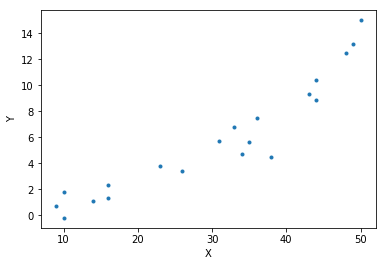

In [551]:
    plt.figure(1)  
    plt.plot(X, Y, '.') 
    plt.xlabel('X')
    plt.ylabel('Y')

Since in this case we want to estimate a model, it is important to split the dataset in a train and test set. 
In this way, we can evaluate our model in the new set (test) that differs from the one used to build the model (train).
We consider 75% of the data as training and the remaining 25% as testing.



In [552]:
#divide dataset

X_train=X[:-5]
X_test=X[-5:]

Y_train=Y[:-5]
Y_test=Y[-5:]

In this case we have a 1-D predictor (X) and a target (Y) so we can first try some simple regression.
We can use the mean square error and the variance score to evaluate the goodness of our prediction.

Mean squared error train: 2.64
Variance score train: 0.88
Mean squared error test: 1.38
Variance score test: 0.84


Text(0, 0.5, 'Y')

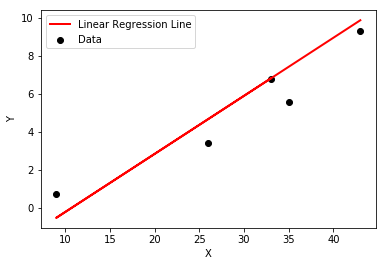

In [553]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train.reshape(-1, 1), Y_train)
y_pred_train=regr.predict(X_train.reshape(-1, 1))


# Make estimation using the testing set
y_pred = regr.predict(X_test.reshape(-1, 1))



# The mean squared error
print("Mean squared error train: %.2f"
      % mean_squared_error(Y_train, y_pred_train))
# Explained variance score: 1 is perfect prediction
print('Variance score train: %.2f' % r2_score(Y_train, y_pred_train))



# The mean squared error
print("Mean squared error test: %.2f"
      % mean_squared_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score test: %.2f' % r2_score(Y_test, y_pred))

# Plot outputs
plt.figure(2)
plt.scatter(X_test, Y_test,  color='black', label='Data')
plt.plot(X_test, y_pred, color='red', linewidth=2,  label='Linear Regression Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

We can try a polynomial fitting or an exponetial to see if we can improve our model.

Mean squared error train-poly: 0.80
Variance score train-poly: 0.96
Mean squared error test-poly: 0.65
Variance score test-poly: 0.92
Mean squared error train-exp: 1.04
Variance score train-exp: 0.95
Mean squared error test-exp: 0.71
Variance score test-exp: 0.92


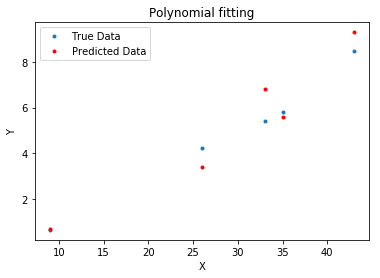

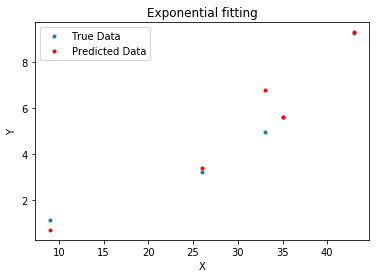

In [554]:
#polynomial fitting
coefs = np.polyfit(X_train, Y_train, 4)
ff = np.poly1d(coefs)
z=np.polyval(ff,X_test)



plt.figure(3)
plt.title('Polynomial fitting')
plt.plot(X_test, z, '.', label='True Data')
plt.plot(X_test, Y_test, 'r.', label='Estimated Data')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

print("Mean squared error train-poly: %.2f"
      % mean_squared_error(Y_train, np.polyval(ff,X_train)))
# Explained variance score: 1 is perfect prediction
print('Variance score train-poly: %.2f' % r2_score(Y_train, np.polyval(ff,X_train)))

print("Mean squared error test-poly: %.2f"
      % mean_squared_error(Y_test, z))
# Explained variance score: 1 is perfect prediction
print('Variance score test-poly: %.2f' % r2_score(Y_test, z))


#exponetial fitting
def func(x, a, b):
    return a * np.exp(-b * x) 

popt, pcov = curve_fit(func, X_train, Y_train)

plt.figure(4)
plt.title('Exponential fitting')
plt.plot(X_test, func(X_test, *popt), '.', label='True Data')
plt.plot(X_test, Y_test, 'r.', label='Estimated Data')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

print("Mean squared error train-exp: %.2f"
      % mean_squared_error(Y_train, func(X_train, *popt)))
# Explained variance score: 1 is perfect prediction
print('Variance score train-exp: %.2f' % r2_score(Y_train, func(X_train, *popt)))


print("Mean squared error test-exp: %.2f"
      % mean_squared_error(Y_test, func(X_test, *popt)))
# Explained variance score: 1 is perfect prediction
print('Variance score test-exp: %.2f' % r2_score(Y_test, func(X_test, *popt)))


The exponential and polynomial fitting (degree 4) are returning similar errors and improve the linear regression. Higher degree polynomial fitting overfits the data (lower error in the training but higher in the testing).

We could finally try to fit a simple neural network (Multi-layer Perceptron regressor).

Mean squared error: 40.49
Variance score: -3.71


([], <a list of 0 Text yticklabel objects>)

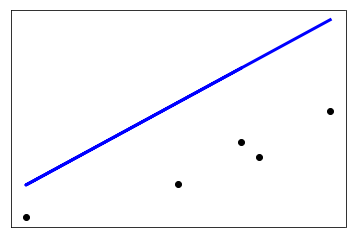

In [555]:
# Build the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(5,),activation='relu')

mlp.fit(X_train.reshape(-1, 1), Y_train)

pred1 = mlp.predict(X_test.reshape(-1, 1))


print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, pred1))

# Plot outputs
plt.figure(2)
plt.scatter(X_test, Y_test,  color='black', label='Data')
plt.plot(X_test, pred1, color='blue', label='Estimated Data')

plt.xticks(())
plt.yticks(())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


Our dataset is quite small and therefore is difficult to train the network and have stable results.
We can conclude that a polynomial function of order 4 is a good model to estimate Y given X.